<h1>Importing Necessary Libraries</h1>

In [245]:
import time
import numpy as np
import pandas as pd
import random
import re
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from scipy import stats
from sklearn.model_selection import cross_val_score

from rdkit import Chem
from rdkit.Chem import BRICS, DataStructs, AllChem, Draw, rdMolDescriptors
from rdkit.Chem import rdchem

# import requests
import os
import math
import pickle
from datetime import datetime
from collections import Counter as counter
import itertools
from numpy.random import default_rng
from itertools import combinations
import sascorer

from matplotlib import font_manager

<h1>List of models</h1>

In [246]:
# XGBRegressor(random_state=random_number,learning_rate=0.2,max_depth=4,n_estimators=300)
# SVR(C=10,epsilon=0.01,kernel='rbf')
# RandomForestRegressor(random_state=random_number)
# ElasticNet(max_iter=2000,alpha= 0.01,l1_ratio=0.1)
# GradientBoostingRegressor(random_state=random_number,learning_rate=0.1, max_depth= 5, n_estimators=300)
# MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='lbfgs', max_iter=500, random_state=random_number)

In [247]:
# Important parameters (Key holders.)
nBits = 2048
radius = 2
random_number = 199 # For now this works best.

# -------------------------------------------------------------------------------------------------------
# Your Place Holders are below. Add your file paths to save the results (Make sure your file paths are correct)

# Your Dataset file path. Make sure you copy the path of your dataset before pasting here.
df_path = 'C:/Users/mache/data_co2_perm_final.csv'

# Your desired file path to save the results.
Results_path = "C:/Users/mache/OneDrive/Desktop/Final_Pub"
whole_folder = Results_path + "/XGBR_O2-GA Results Folder" # Edit folder name here to your wish
font_path = 'C:/Users/mache/Downloads/Noticia_Text' # Paste your appropriate font path here.
# --------------------------------------------------------------------------------------------------------


# Don't Change below.
ML_model_path = whole_folder +"/MLModels"
GA_polymers_path = whole_folder +"/GA Results Datasets"
GA_plots_path = whole_folder +"/Plots"


<h1>Code starts below</h1>

<h1>ML part</h1>

In [248]:
df = pd.read_csv(df_path)

In [249]:
df.describe()

,CO2,O2,N2,CO2/O2,CO2/N2
count,596.000000,596.000000,596.000000,596.000000,596.000000
mean,1368.694294,427.930726,308.469613,4.673172,23.009541
std,5581.230662,1969.870228,1608.829041,3.411531,25.884070
min,0.000700,0.000280,0.000030,0.380000,1.230000
25%,5.075000,1.261516,0.218469,3.629746,14.942500
50%,18.000000,3.988805,0.850110,4.131823,21.655000
75%,98.200000,22.019030,6.409907,4.893532,26.497857
max,47000.000000,18728.810000,16616.540000,53.190000,472.770000


In [250]:
df.corr()

,CO2,O2,N2,CO2/O2,CO2/N2
CO2,1.000000,0.985369,0.967654,-0.088013,-0.160362
O2,0.985369,1.000000,0.995328,-0.094068,-0.150050
N2,0.967654,0.995328,1.000000,-0.091164,-0.137806
CO2/O2,-0.088013,-0.094068,-0.091164,1.000000,0.878164
CO2/N2,-0.160362,-0.150050,-0.137806,0.878164,1.000000


In [251]:
smiles_list = df['SMILES'].tolist()
df_fps = []
df_fp_bitvect = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        df_fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
        df_fp_bitvect.append(df_fp)
        df_fp_array = np.asarray(df_fp)
        df_fps.append(df_fp_array)
    else:
        df_fps.append(None)
        df_fp_bitvect.append(None)

df_fps = np.asarray(df_fps)
df_fp_bitvect = [fp for fp in df_fp_bitvect if fp is not None]
Y=df[['CO2','O2','N2']].values


KeyboardInterrupt: 

In [ ]:
df_fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:

# Data preprocessing
scaler = StandardScaler()
Y_log = np.log(Y)  
Y_scaled = scaler.fit_transform(Y_log)

# (80:20 split)
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_fps, Y_log, test_size=0.2, random_state=random_number)

# Initialize models (Here you replace with different models). Uncomment them and use in the model_CO2, model_O2 and model_N2

# XGBRegressor(random_state=random_number,learning_rate=0.2,max_depth=4,n_estimators=300)
# SVR(C=10,epsilon=0.01,kernel='rbf')
# RandomForestRegressor(random_state=random_number)
# ElasticNet(max_iter=2000,alpha= 0.01,l1_ratio=0.1)
# GradientBoostingRegressor(random_state=random_number,learning_rate=0.1, max_depth= 5, n_estimators=300)
# MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='lbfgs', max_iter=500, random_state=random_number)

model_CO2 = XGBRegressor(random_state=random_number,learning_rate=0.2,max_depth=4,n_estimators=300)
model_O2 = XGBRegressor(random_state=random_number,learning_rate=0.2,max_depth=4,n_estimators=300)
model_N2 = XGBRegressor(random_state=random_number,learning_rate=0.2,max_depth=4,n_estimators=300)

# K-fold cross-validation on the training set for each target variable
kf = KFold(n_splits=10, shuffle=True, random_state=random_number)

# Function to perform K-fold cross-validation and calculate both RMSE and R²
def cross_val_rmse_r2(model, X, y):
    rmse_scores = []
    r2_scores = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        r2 = r2_score(y_val, y_pred)
        
        rmse_scores.append(rmse)
        r2_scores.append(r2)
        
    return rmse_scores, r2_scores

# CO2
cv_rmse_scores_CO2, cv_r2_scores_CO2 = cross_val_rmse_r2(model_CO2, df_x_train, df_y_train[:, 0])
print("Cross-validated RMSE scores for CO2:", cv_rmse_scores_CO2)
print("Mean cross-validated RMSE for CO2:", np.mean(cv_rmse_scores_CO2))
print()
print("Cross-validated R² scores for CO2:", cv_r2_scores_CO2)
print("Mean cross-validated R² for CO2:", np.mean(cv_r2_scores_CO2))
print()

# O2
cv_rmse_scores_O2, cv_r2_scores_O2 = cross_val_rmse_r2(model_O2, df_x_train, df_y_train[:, 1])
print("Cross-validated RMSE scores for O2:", cv_rmse_scores_O2)
print("Mean cross-validated RMSE for O2:", np.mean(cv_rmse_scores_O2))
print()
print("Cross-validated R² scores for O2:", cv_r2_scores_O2)
print("Mean cross-validated R² for O2:", np.mean(cv_r2_scores_O2))
print()

# N2
cv_rmse_scores_N2, cv_r2_scores_N2 = cross_val_rmse_r2(model_N2, df_x_train, df_y_train[:, 2])
print("Cross-validated RMSE scores for N2:", cv_rmse_scores_N2)
print("Mean cross-validated RMSE for N2:", np.mean(cv_rmse_scores_N2))
print()
print("Cross-validated R² scores for N2:", cv_r2_scores_N2)
print("Mean cross-validated R² for N2:", np.mean(cv_r2_scores_N2))
print()

# Train the final models on the entire training set
model_CO2.fit(df_x_train, df_y_train[:, 0])
df_Y_train_CO2 = model_CO2.predict(df_x_train)
df_Y_pred_CO2 = model_CO2.predict(df_x_test)

model_O2.fit(df_x_train, df_y_train[:, 1])
df_Y_train_O2 = model_O2.predict(df_x_train)
df_Y_pred_O2 = model_O2.predict(df_x_test)

model_N2.fit(df_x_train, df_y_train[:, 2])
df_Y_train_N2 = model_N2.predict(df_x_train)
df_Y_pred_N2 = model_N2.predict(df_x_test)

# Calculate RMSE and R2 for predictions on the test set
rmse_CO2_test = mean_squared_error(df_y_test[:, 0], df_Y_pred_CO2, squared=False)
r2_CO2_test = r2_score(df_y_test[:, 0], df_Y_pred_CO2)
# print("Test RMSE for CO2:", rmse_CO2_test)
print("Test R-squared (R2) for CO2:", r2_CO2_test)

rmse_O2_test = mean_squared_error(df_y_test[:, 1], df_Y_pred_O2, squared=False)
r2_O2_test = r2_score(df_y_test[:, 1], df_Y_pred_O2)
# print("Test RMSE for O2:", rmse_O2_test)
print("Test R-squared (R2) for O2:", r2_O2_test)

rmse_N2_test = mean_squared_error(df_y_test[:, 2], df_Y_pred_N2, squared=False)
r2_N2_test = r2_score(df_y_test[:, 2], df_Y_pred_N2)
# print("Test RMSE for N2:", rmse_N2_test)
print("Test R-squared (R2) for N2:", r2_N2_test)
print()

# Calculate RMSE and R2 for predictions on the train set
rmse_CO2_train = mean_squared_error(df_y_train[:, 0], df_Y_train_CO2, squared=False)
r2_CO2_train = r2_score(df_y_train[:, 0], df_Y_train_CO2)
# print("Train RMSE for CO2:", rmse_CO2_train)
print("Train R-squared (R2) for CO2:", r2_CO2_train)

rmse_O2_train = mean_squared_error(df_y_train[:, 1], df_Y_train_O2, squared=False)
r2_O2_train = r2_score(df_y_train[:, 1], df_Y_train_O2)
# print("Train RMSE for O2:", rmse_O2_train)
print("Train R-squared (R2) for O2:", r2_O2_train)

rmse_N2_train = mean_squared_error(df_y_train[:, 2], df_Y_train_N2, squared=False)
r2_N2_train = r2_score(df_y_train[:, 2], df_Y_train_N2)
# print("Train RMSE for N2:", rmse_N2_train)
print("Train R-squared (R2) for N2:", r2_N2_train)
print()

# Finding test set indices and corresponding SMILES strings
df_x_test_list = list(df_x_test)
df_x_test_indices = [np.where(np.all(df_fps == i, axis=1))[0][0] for i in df_x_test_list]
df_x_test_smiles = [smiles_list[i] for i in df_x_test_indices]

# Combining predictions into DataFrame
results_df_training = pd.DataFrame({'SMILES': df_x_test_smiles,
                                    'Predicted_CO2': df_Y_pred_CO2,
                                    'Predicted_O2': df_Y_pred_O2,
                                    'Predicted_N2': df_Y_pred_N2})

results_df_training['Predicted_CO2'] = np.exp(results_df_training['Predicted_CO2'])
results_df_training['Predicted_O2'] = np.exp(results_df_training['Predicted_O2'])
results_df_training['Predicted_N2'] = np.exp(results_df_training['Predicted_N2'])

Cross-validated RMSE scores for CO2: [1.5311139766719575, 0.8159659339017143, 1.4372444710949892, 1.582338101020109, 2.1012588975088833, 1.258971271105096, 1.6151126893585388, 1.7519627675865828, 1.6725481617628064, 1.0930128419331537]
Mean cross-validated RMSE for CO2: 1.4859529111943832

Cross-validated R² scores for CO2: [0.6413277642549944, 0.882777225790979, 0.6658925831981641, 0.6691012718792306, 0.48955796160330867, 0.8010974858796036, 0.6752290182347078, 0.6249788916543788, 0.7481556907021139, 0.8419313126343164]
Mean cross-validated R² for CO2: 0.7040049205831798

Cross-validated RMSE scores for O2: [1.4055029932222871, 0.7312648554827073, 1.373817889923781, 1.330957028597882, 2.092770600584836, 1.2363393284400688, 1.7416117720180575, 1.6878828345271004, 1.5159814559699814, 1.1098542562812723]
Mean cross-validated RMSE for O2: 1.4225983015047974

Cross-validated R² scores for O2: [0.7076157582795939, 0.9071137636663333, 0.7051709424872545, 0.750398788762378, 0.5053256817559248

In [ ]:
locations = [font_path]
font_files = font_manager.findSystemFonts(fontpaths=locations)

In [ ]:
for file in font_files:
    font_manager.fontManager.addfont(file)

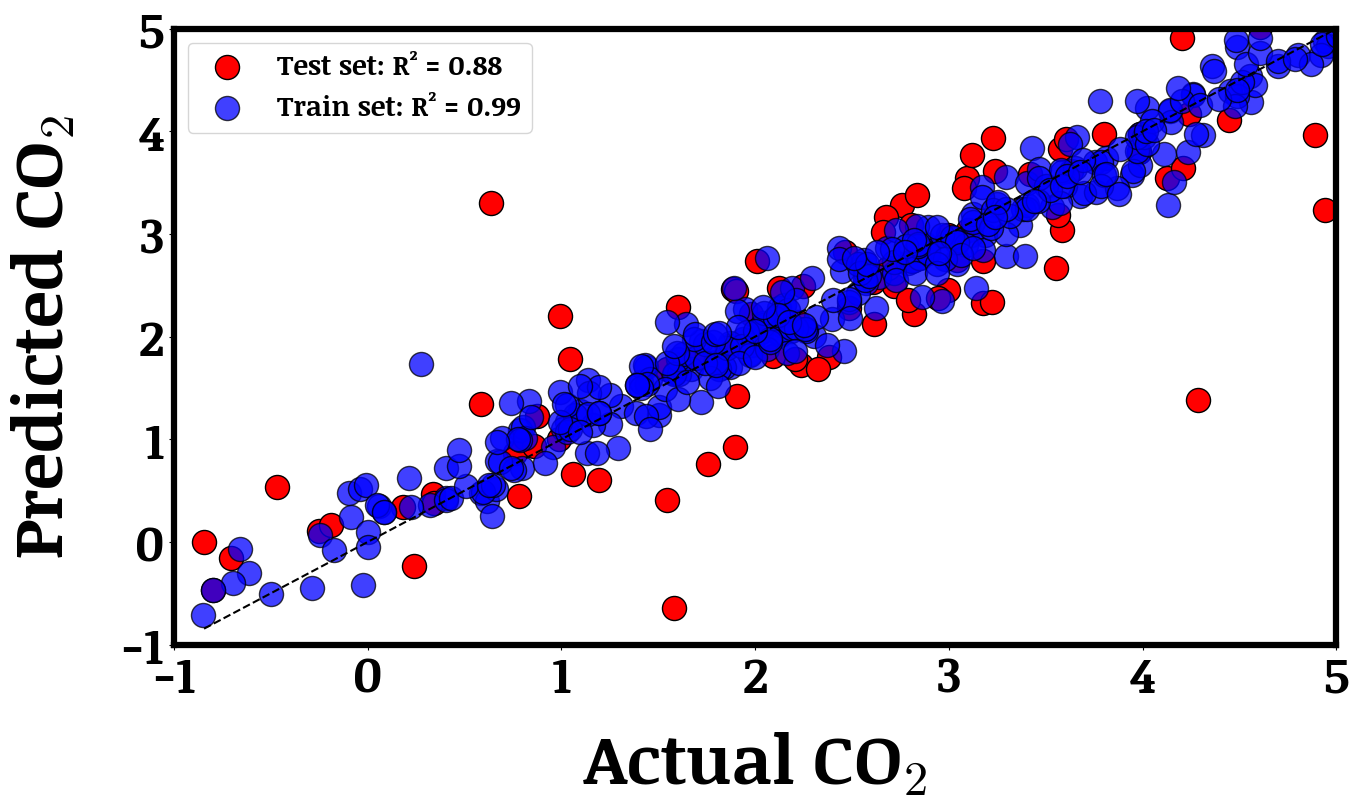

In [ ]:
df['O2/N2'] = df['O2']/df['N2']

# Set plot parameters for Times New Roman font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Noticia Text'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.linewidth'] = 4.5
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 35
plt.rcParams['xtick.labelsize'] = 35  
plt.rcParams['ytick.labelsize'] = 35  
for p in plt.rcParams:
    if 'weight' in p:
        plt.rcParams[p] = 'bold'

# Training set predictions for CO2
df_Y_train_pred_CO2 = model_CO2.predict(df_x_train) 

# Calculate R² for training set
r2_train_CO2 = r2_score(df_y_train[:, 0], df_Y_train_pred_CO2)

# Plotting Pco2 vs Actual Pco2
plt.figure(figsize=(15, 8))  # Change the size here

# Plot test set predictions
plt.scatter(df_y_test[:, 0], df_Y_pred_CO2, color='red',s=300,edgecolors='black', label=f'Test set: R² = {r2_CO2_test:.2f}')

# Plot training set predictions
plt.scatter(df_y_train[:, 0], df_Y_train_pred_CO2, color='blue',s=300,edgecolors='black', alpha=0.75, label=f'Train set: R² = {r2_train_CO2:.2f}')

# Line of perfect prediction
plt.plot([df_y_test[:, 0].min(), df_y_test[:, 0].max()], [df_y_test[:, 0].min(), df_y_test[:, 0].max()], color='black', linestyle='--')

# Move the legend to the top left corner
plt.legend(loc='upper left')

# Labels and title
plt.xlabel(r'Actual CO$_2$',size=50,labelpad=20)
plt.ylabel(r'Predicted CO$_2$',size=50,labelpad=30)
plt.xlim(-1,5)
plt.ylim(-1,5)
plt.legend()

ml_time = datetime.now().strftime("%Y%m%d%H%M%S")
path = ML_model_path
model_name = model_CO2.__class__.__name__


if not os.path.exists(path):
    os.makedirs(path)
final_path = os.path.join(path, f"{model_name}_CO2_predictions_plot_{ml_time}.png")

plt.savefig(final_path, dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
# Set plot parameters for Times New Roman font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Noticia Text'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.linewidth'] = 4.5
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 35
plt.rcParams['xtick.labelsize'] = 35  
plt.rcParams['ytick.labelsize'] = 35  
for p in plt.rcParams:
    if 'weight' in p:
        plt.rcParams[p] = 'regular'


<h1>GA</h1>

In [ ]:
def replace_number_star(smiles):
    return re.sub(r'\[\d+\*\]', '[*]', smiles)


def asterisk_blocks(smiles):
    final_blocks = []
    for i in smiles:
        mol = Chem.MolFromSmiles(i)
        temp_blocks = list(BRICS.BRICSDecompose(mol))
        final_blocks.append(temp_blocks)
    flat_list = [j for i in final_blocks for j in i]
    new_smiles_list = [replace_number_star(smiles) for smiles in flat_list]
    brics_blocks_final = [smiles for smiles in new_smiles_list if smiles.count('[*]') == 2]
    brics_blocks = list(set(brics_blocks_final))
    return brics_blocks

def longest_smiles(smiles):
    smiles = smiles.replace('*', '[*]')
    mol_temp = Chem.MolFromSmiles(smiles)
    at_idx = []
    try:
        num_atom_m = mol_temp.GetNumAtoms()
    except:
        return ''
    
    for atom in mol_temp.GetAtoms():
        if atom.GetSymbol() == 'Bi':
            at_idx.append(atom.GetIdx())
    
    star_pairs = list(itertools.combinations(at_idx, 2))
    len_path_max = -999
    idx1, idx2 = 0, 0

    for star_pair in star_pairs:
        path_temp = Chem.GetShortestPath(mol_temp, star_pair[0], star_pair[1])
        len_path = len(path_temp)
        if len_path > len_path_max:
            len_path_max = len_path
            idx1, idx2 = star_pair

    for idx in at_idx:
        if idx == idx1 or idx == idx2:
            mol_temp.GetAtomWithIdx(idx).SetAtomicNum(82)

    smiles = Chem.MolToSmiles(mol_temp)
    smiles = smiles.replace('([*])', '').replace('[Bi]', '').replace('[Pb]', '[*]')
    return smiles

def combine_random_blocks(input_list, num_combinations):
    new_polymers = []
    for _ in range(num_combinations):
        selected_blocks = [block for block in rng.choice(input_list, 4, replace=False) if Chem.MolFromSmiles(block) is not None]
        mols_of_blocks = [Chem.MolFromSmiles(block) for block in selected_blocks]
        
        mols_edtg, mols_at_idx = [], []

        for m in mols_of_blocks:
            at_idx = [atom.GetIdx() for atom in m.GetAtoms() if atom.GetSymbol() == 'Bi']
            edtg = [''] * len(at_idx)


            if len(at_idx) >= 2:
                temp_list_idx = list(range(len(at_idx)))
                temp_rnd_e = rng.choice(temp_list_idx)
                edtg[temp_rnd_e] = 'e'
                temp_list_idx.remove(temp_rnd_e)

                temp_rnd_t = rng.choice(temp_list_idx)
                edtg[temp_rnd_t] = 't'

            mols_at_idx.append(at_idx)
            mols_edtg.append(edtg)

        endatom = {'e': ['Sb', 51], 't': ['Po', 84]}

        for m, edtg, at_idx in zip(mols_of_blocks, mols_edtg, mols_at_idx):
            for key, (symbol, atomic_num) in endatom.items():
                if key in edtg:
                    idx = edtg.index(key)
                    m.GetAtomWithIdx(at_idx[idx]).SetAtomicNum(atomic_num)

        L_mol = mols_of_blocks[0]
        L_n_atoms = L_mol.GetNumAtoms()
        L_ms_edtg = mols_edtg[0]
        L_ms_at_idx = mols_at_idx[0]

        for i in range(1, len(mols_of_blocks)):
            R_mol = mols_of_blocks[i]
            R_ms_edtg = mols_edtg[i]
            R_ms_at_idx = mols_at_idx[i]

            if 't' in L_ms_edtg and 'e' in R_ms_edtg:
                L_index_of_t = L_ms_at_idx[L_ms_edtg.index('t')]
                R_index_of_e = R_ms_at_idx[R_ms_edtg.index('e')]
            else:
                continue

            combo = Chem.CombineMols(L_mol, R_mol)
            edcombo = Chem.EditableMol(combo)
            edcombo.AddBond(L_index_of_t, R_index_of_e + L_n_atoms, order=rdchem.BondType.SINGLE)

            L_mol = edcombo.GetMol()
            L_ms_edtg = [''] * len(L_ms_edtg)
            L_ms_edtg.extend(R_ms_edtg)
            L_ms_at_idx.extend([x + L_n_atoms for x in R_ms_at_idx])
            L_n_atoms = L_mol.GetNumAtoms()

        SMILES_connected = Chem.MolToSmiles(L_mol)
        SMILES_connected = (SMILES_connected.replace("[Po][Sb]", "")
                                            .replace("[Sb][Po]", "")
                                            .replace("[Po]", "[*]")
                                            .replace("[Sb]", "[*]")
                                            .replace("[Bi]", "[*]"))

        if SMILES_connected.count('[*]') > 2:
            SMILES_connected = longest_smiles(SMILES_connected)

        new_polymers.append(SMILES_connected)

    return new_polymers

def tanimoto_similarity(smiles1, smiles2):
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)
    if mol1 is None or mol2 is None:
        return None
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2)
    return DataStructs.TanimotoSimilarity(fp1, fp2)

def find_lowest_tanimoto_pairs(sublists):
    lowest_pairs = []
    for sublist in sublists:
        min_similarity = float('inf')
        min_pair = (None, None)
        for i in range(len(sublist)):
            for j in range(i+1, len(sublist)):
                sim = tanimoto_similarity(sublist[i], sublist[j])
                if sim is not None and sim < min_similarity:
                    min_similarity = sim
                    min_pair = [sublist[i], sublist[j]]
        lowest_pairs.append(min_pair)
    return lowest_pairs

def brics_decomposition(smiles_list):
    all_blocks = []
    for sublist in smiles_list:
        sublist_blocks = []
        for smiles in sublist:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                blocks = list(BRICS.BRICSDecompose(mol))
                cleaned_blocks = [replace_number_star(block) for block in blocks]
                sublist_blocks.append(cleaned_blocks)
            else:
                sublist_blocks.append(None)
        all_blocks.append(sublist_blocks)
    return all_blocks

def check_four_blocks_per_sublists(brics_blocks):
    for i, sublist in enumerate(brics_blocks):
        for j, blocks in enumerate(sublist):
            if blocks is None or len(blocks) != 4:
                return False, f"Sublist {i+1}, Molecule {j+1} does not have exactly 4 blocks."
    return True, "All sublists contain exactly 4 blocks."

# Function to mutate blocks
def mutate(chromosomes, land_chromosomes, fraction_mutation, mutation_sigma_offset, fraction_mutate_additional_block):
    num_to_mutate = round(rng.normal(len(chromosomes) * fraction_mutation, mutation_sigma_offset))
    if num_to_mutate > len(chromosomes):
        num_to_mutate = len(chromosomes)
    if num_to_mutate > 0:
        indices = [x for x in range(len(chromosomes))]
        indices_to_mutate = list(rng.choice(indices, size=num_to_mutate, replace=False))
        mutations = list(rng.choice(land_chromosomes, size=num_to_mutate))
        for i in range(num_to_mutate):
            chromosomes[indices_to_mutate[i]] = mutations[i]
    if rng.random() < fraction_mutate_additional_block:
        mutation = rng.choice(land_chromosomes, size=1)
        chromosomes.append(mutation[0])
    return chromosomes

def standardize_wildcards(smiles_list):
    standardized_list = []
    for smiles in smiles_list:
        # Replace '*' with '[*]', but skip if it's already '[*]'
        standardized_smiles = smiles.replace('[*]', 'STAR')  # Temporarily replace '[*]' to avoid double replacement
        standardized_smiles = standardized_smiles.replace('*', '[*]')
        standardized_smiles = standardized_smiles.replace('STAR', '[*]')  # Reverting the temporary replacement
        standardized_list.append(standardized_smiles)
    return standardized_list

def crossover(lowest_swap_blocks):
    swapped_blocks = []
    
    for block_pair in lowest_swap_blocks:
        l1 = block_pair[0]
        l2 = block_pair[1]
        length = len(l1)
        
        # Generate combinations
        new_block_1 = l1[:length//2] + l2[:length//2]
        new_block_2 = l1[:length//2] + l2[length//2:]
        new_block_3 = l2[:length//2] + l1[length//2:]
        new_block_4 = l1[length//2:] + l2[length//2:]
        
        swapped_blocks.append(new_block_1)
        swapped_blocks.append(new_block_2)
        swapped_blocks.append(new_block_3)
        swapped_blocks.append(new_block_4)
        
    return [swapped_blocks]

# Functions to build polymers again
def longest_smiles(smiles):
    smiles = smiles.replace('*', '[*]')
    mol_temp = Chem.MolFromSmiles(smiles)
    at_idx = []
    try:
        num_atom_m = mol_temp.GetNumAtoms()
    except:
        return ''
    
    for atom in mol_temp.GetAtoms():
        if atom.GetSymbol() == 'Bi':
            at_idx.append(atom.GetIdx())
    
    star_pairs = list(itertools.combinations(at_idx, 2))
    len_path_max = -999
    idx1, idx2 = 0, 0

    for star_pair in star_pairs:
        path_temp = Chem.GetShortestPath(mol_temp, star_pair[0], star_pair[1])
        len_path = len(path_temp)
        if len_path > len_path_max:
            len_path_max = len_path
            idx1, idx2 = star_pair

    for idx in at_idx:
        if idx == idx1 or idx == idx2:
            mol_temp.GetAtomWithIdx(idx).SetAtomicNum(82)

    smiles = Chem.MolToSmiles(mol_temp)
    smiles = smiles.replace('([*])', '').replace('[Bi]', '').replace('[Pb]', '[*]')
    return smiles

def combine_mutated_blocks(families_list):
    new_polymers = []

    for family in families_list:
        selected_blocks = [block for block in family if Chem.MolFromSmiles(block) is not None]
        mols_of_blocks = [Chem.MolFromSmiles(block) for block in selected_blocks]
        
        mols_edtg, mols_at_idx = [], []

        for m in mols_of_blocks:
            at_idx = [atom.GetIdx() for atom in m.GetAtoms() if atom.GetSymbol() == 'Bi']
            edtg = [''] * len(at_idx)

            if len(at_idx) >= 2:
                temp_list_idx = list(range(len(at_idx)))
                temp_rnd_e = rng.choice(temp_list_idx)
                edtg[temp_rnd_e] = 'e'
                temp_list_idx.remove(temp_rnd_e)

                temp_rnd_t = rng.choice(temp_list_idx)
                edtg[temp_rnd_t] = 't'

            mols_at_idx.append(at_idx)
            mols_edtg.append(edtg)

        endatom = {'e': ['Sb', 51], 't': ['Po', 84]}

        for m, edtg, at_idx in zip(mols_of_blocks, mols_edtg, mols_at_idx):
            for key, (symbol, atomic_num) in endatom.items():
                if key in edtg:
                    idx = edtg.index(key)
                    m.GetAtomWithIdx(at_idx[idx]).SetAtomicNum(atomic_num)

        L_mol = mols_of_blocks[0]
        L_n_atoms = L_mol.GetNumAtoms()
        L_ms_edtg = mols_edtg[0]
        L_ms_at_idx = mols_at_idx[0]

        for i in range(1, len(mols_of_blocks)):
            R_mol = mols_of_blocks[i]
            R_ms_edtg = mols_edtg[i]
            R_ms_at_idx = mols_at_idx[i]

            if 't' in L_ms_edtg and 'e' in R_ms_edtg:
                L_index_of_t = L_ms_at_idx[L_ms_edtg.index('t')]
                R_index_of_e = R_ms_at_idx[R_ms_edtg.index('e')]
            else:
                continue

            combo = Chem.CombineMols(L_mol, R_mol)
            edcombo = Chem.EditableMol(combo)
            edcombo.AddBond(L_index_of_t, R_index_of_e + L_n_atoms, order=rdchem.BondType.SINGLE)

            L_mol = edcombo.GetMol()
            L_ms_edtg = [''] * len(L_ms_edtg)
            L_ms_edtg.extend(R_ms_edtg)
            L_ms_at_idx.extend([x + L_n_atoms for x in R_ms_at_idx])
            L_n_atoms = L_mol.GetNumAtoms()

        SMILES_connected = Chem.MolToSmiles(L_mol)
        SMILES_connected = (SMILES_connected.replace("[Po][Sb]", "")
                                            .replace("[Sb][Po]", "")
                                            .replace("[Po]", "[*]")
                                            .replace("[Sb]", "[*]")
                                            .replace("[Bi]", "[*]"))

        if SMILES_connected.count('[*]') > 2:
            SMILES_connected = longest_smiles(SMILES_connected)

        new_polymers.append(SMILES_connected)

    return new_polymers



# Build cross-overed and mutated polymers
def replace_star_with_bi(blocks):
    return [[[block.replace('[*]', '[Bi]') for block in sublist] for sublist in inner_list] for inner_list in blocks]

# Convert generated polymers to ECFP4 fingerprints
def convert_to_fingerprints(smiles_list, radius=2, nBits=2048):
    fingerprints = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=nBits)
            fingerprints.append(fp)
        else:
            fingerprints.append(None)
    return fingerprints

# Predict properties using the trained models
def predict_properties(fingerprints, model_CO2, model_O2, model_N2):
    predictions = []
    for fp in fingerprints:
        if fp is not None:
            fp_array = np.asarray(fp)
            CO2_pred = model_CO2.predict([fp_array])[0]
            O2_pred = model_O2.predict([fp_array])[0]
            N2_pred = model_N2.predict([fp_array])[0]
            predictions.append((CO2_pred, O2_pred, N2_pred))
        else:
            predictions.append((None, None, None))
    return predictions



def migrate(data, migration_rate):
    if not 0 <= migration_rate <= 1:
        raise ValueError("Migration rate should be between 0 and 1")

    num_elements = len(data)
    num_to_migrate = int(num_elements * migration_rate)

    migrated_data = data[:]
    
    for _ in range(num_to_migrate // 2):
        if len(migrated_data) < 2:
            continue
        # Select two random elements to migrate
        idx1 = random.randint(0, len(migrated_data) - 1)
        element1 = migrated_data.pop(idx1)
        idx2 = random.randint(0, len(migrated_data) - 1)
        element2 = migrated_data.pop(idx2 if idx2 < idx1 else idx2 - 1)

        # Choose random positions to insert the elements
        target_idx1 = random.randint(0, len(migrated_data))
        target_idx2 = random.randint(0, len(migrated_data))
        while target_idx1 == target_idx2:
            target_idx2 = random.randint(0, len(migrated_data))

        # Insert the elements back into the list
        migrated_data.insert(target_idx1, element1)
        migrated_data.insert(target_idx2, element2)

    return migrated_data




In [ ]:
some_random = random.randint(1,100)
print(some_random)

90


In [ ]:
print(some_random)

90


In [ ]:
smiles = df['SMILES'].tolist()
# random.seed(42)
rng = default_rng(seed=some_random)
fraction_mutation = 0.6 # Muatation rate
mutation_sigma_offset = 0.3
fraction_mutate_additional_block = 0.2    
migration_rate = 0.5 # Migration Rate

# Break polymers using BRICS algorithm
brics_blocks_temp = asterisk_blocks(smiles)
brics_blocks = [molecule.replace('[*]', '[Bi]') for molecule in brics_blocks_temp]


# Random combination and 100 polymer generation
new_polymers = combine_random_blocks(brics_blocks, num_combinations=100)

# Split them into 15 families
sublists_1 = [new_polymers[i:i + 6] for i in range(0, 30, 6)]
sublists_2 = [new_polymers[i:i + 7] for i in range(30, len(new_polymers), 7)]
fam15 = sublists_1 + sublists_2 #[[a1,a2,a3,a4,a5,a6],[a7,a8,a9,a10,a11,a12],....]

# Lowest Tanimoto Pairs
lowest_pairs = find_lowest_tanimoto_pairs(fam15)

# Decomposing to get the blocks for crossover
lowest_swap_blocks = brics_decomposition(lowest_pairs)

# Check whether each family has 4 blocks
is_valid, message = check_four_blocks_per_sublists(lowest_swap_blocks)
print(message)

# Apply the standardize_wildcards function to each sublist and block
standardized_blocks = [[standardize_wildcards(block) for block in sublist] for sublist in lowest_swap_blocks]

# Apply Crossover
swapped_blocks = crossover(standardized_blocks)

# Applying mutation to crossovered blocks
land_chromosomes = brics_blocks  # Assuming these are the available blocks for mutation
for sublist in swapped_blocks:
    for i, blocks in enumerate(sublist):
        sublist[i] = mutate(blocks, land_chromosomes,fraction_mutation, mutation_sigma_offset, fraction_mutate_additional_block)

# Replacing [*] with [Bi] for building polymers again
mutated_next = replace_star_with_bi(swapped_blocks)
print(mutated_next)
# Building back the polymers
new_polymers_mutated = combine_mutated_blocks(mutated_next[0])

# print(len(new_polymers_mutated))
# print()
# print("new_polymers_mutated",new_polymers_mutated)


new_built_migration = new_polymers_mutated
new_built_migration_final = [molecule.replace('*', 'Bi') for molecule in new_built_migration]

print(new_built_migration_final)
# Convert the newly built polymers into ECFP4 fingerprints for ML prediction
new_polymer_fps = convert_to_fingerprints(new_built_migration_final)


# Performing ML prediction on them
predictions = predict_properties(new_polymer_fps, model_CO2, model_O2, model_N2)

# Measure the SAScore and save it as well.
sascores_list = []
for smiles in new_built_migration:
    mol = Chem.MolFromSmiles(smiles)
    # Calculate SAScore
    sa_score = sascorer.calculateScore(mol)
    sascores_list.append(sa_score)

# Store respective SMILES and predicted values in a CSV file
results_df = pd.DataFrame({
    'SMILES': new_built_migration,
    'Predicted_CO2': [pred[0] for pred in predictions],
    'Predicted_O2': [pred[1] for pred in predictions],
    'Predicted_N2': [pred[2] for pred in predictions],
    'SAScores' : sascores_list
})

results_df['Predicted_CO2'] = np.exp(results_df['Predicted_CO2'])
results_df['Predicted_O2'] = np.exp(results_df['Predicted_O2'])
results_df['Predicted_N2'] = np.exp(results_df['Predicted_N2'])

current_time = datetime.now().strftime("%Y%m%d%H%M%S")

# Calculate fitness function and pick top 10 polymers
# (3/(1/results_df['Predicted_CO2'])+(1/results_df['Predicted_O2'])+(1/results_df['Predicted_N2']))  ----> Harmonic Mean of Permeabilities
# (np.cbrt(results_df['Predicted_CO2']*results_df['Predicted_O2']*results_df['Predicted_N2'])) ----> Cube Root Product of Permeabilities
# (np.log(results_df['Predicted_CO2'])*(results_df['Predicted_CO2']/results_df['Predicted_O2'])*(results_df['Predicted_CO2']/results_df['Predicted_N2'])) ----> logPco2 * alphaO2 * alphaN2
# (results_df['Predicted_CO2']*(results_df['Predicted_CO2']/results_df['Predicted_O2'])*(results_df['Predicted_CO2']/results_df['Predicted_N2'])) ----> Pco2 * alphaO2 * alphaN2 
# (results_df['Predicted_CO2']*(results_df['Predicted_CO2']/results_df['Predicted_O2'])*(results_df['Predicted_CO2']/results_df['Predicted_N2']))/results_df['SAScores'] ----> (Pco2 * alphaO2 * alphaN2)/SASores

results_df['Fitness'] = (results_df['Predicted_O2']*(results_df['Predicted_O2']/results_df['Predicted_N2']))
top_10_polymers = results_df.nlargest(10, 'Fitness')['SMILES'].tolist()
print("top_10_polymers ", top_10_polymers)
print()
# Applying migration to 10% of families
migrated_data = migrate(top_10_polymers, migration_rate)


# Storing the top 10 polymers in a list
top_10_smiles = migrated_data
print("migrated polymers ", top_10_smiles)


Sublist 2, Molecule 1 does not have exactly 4 blocks.
[[['[Bi]CC([Bi])=O', '[Bi]c1ccc([Bi])cc1', '[Bi]N1C(=O)C2C([Bi])CC(C=C)C2C1=O', '[Bi]c1cncc([Bi])c1', '[Bi]n1nc([Bi])c2ccccc2c1=O'], ['[Bi]C([Bi])C(F)(F)F', '[Bi]c1ccc(N)cc1[Bi]', '[Bi]C([Bi])(C)C', '[Bi]N[Bi]'], ['[Bi]c1ccc2cc([Bi])ccc2c1', '[Bi]c1cc([Bi])cc(C=O)c1', '[Bi]c1c(C)ccc(C)c1[Bi]', '[Bi]c1cccc([Bi])n1'], ['[Bi]c1cc([Bi])c(O)cc1C', '[Bi]c1ccc(C2(c3ccc([Bi])cc3)OC(=O)c3ccccc32)cc1', '[Bi]c1ccc([Bi])c(C)c1', '[Bi]c1cc([Bi])ccc1C'], ['[Bi]N1C(=O)C2C([Bi])CC(C=C)C2C1=O', '[Bi]c1ccc([Bi])c([N+](=O)[O-])c1'], ['[Bi]c1ccc2cc([Bi])ccc2c1', '[Bi]c1cc(C)c([Bi])c2ccccc12', '[Bi]c1cccc([Bi])c1C'], ['[Bi]n1nc([Bi])c2ccccc2c1=O', '[Bi]n1c2ccccc2c2cc([Bi])ccc21', '[Bi]c1nc2ccc([Bi])cc2c(=O)o1'], ['[Bi]C1([Bi])CC(C)CC(C)(C)C1', '[Bi]O[P+](=N)ON1C(=O)C2CCC([Bi])C2C1=O', '[Bi]c1ccc2c(c1)C1(CC2(C)C)CC(C)(C)c2ccc([Bi])cc21', '[Bi]C(C(F)(F)F)C([Bi])(C(F)(F)F)C(F)(F)F'], ['[Bi]C([Bi])=O', '[Bi]C1OC(F)(F)OC1([Bi])F', '[Bi]C1OC(O)C([Bi])C(O)C1O'

In [255]:
print(new_polymers)
print(fam15)
print(len(lowest_pairs))
print()
print(lowest_swap_blocks)
print(standardized_blocks[0])
print()
print(swapped_blocks[0])
print(len(mutated_next[0]))
print()
print()
print()
print(new_built_migration_final)

['Cc1cc(O)c(c2nc3ccc(c4cc([*])ccc4O)cc3c(=O)o2)cc1c1cc2c(cc1[*])C(=O)NC2=O', 'Cc1cc(c2c(C)cc([*])c3ccccc23)c(C)c(C)c1C1(c2ccc3c(c2)C2(CC(C)(C)c4ccc([*])cc42)CC3(C)C)CC2CCC1C2', 'O=C(CN[*])C1(c2ccc(C3(c4ccc([*])cc4)OC(=O)c4ccccc43)cc2)CCCCC1', 'O=C([*])c1ccc(c2ccc(C3(c4ccc(c5ccccc5[*])cc4)c4ccccc4-c4ccccc43)cc2)c(F)c1', 'Cc1ccc(c2ccc3cc(c4cc(C=O)cc(C(C)(C)[*])c4)ccc3c2)cc1[*]', 'Cc1ccc(c2c(Cl)cc(Nc3c(C)cc([*])cc3Br)cc2Cl)cc1[*]', 'Cc1c([*])cccc1c1ccc(C2(c3ccc(C(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)c4cc(Br)c([*])c(Br)c4)cc3)OC(=O)c3ccccc32)cc1', 'Cc1cc(C2([*])C3CC4CC(C3)CC2C4)c(C)cc1c1cc2c(cc1c1cc([*])ccc1C)C(=O)NC2=O', 'N=[P+](Oc1ccc2cc([*])ccc2c1)ON1C(=O)C2CCC(c3ccc4c(c3)c3ccccc3n4[*])C2C1=O', 'O=C1C2CCC(c3ccc([*])c([N+](=O)[O-])c3)C2C(=O)N1c1ccc2c(c1)c1ccccc1n2C([*])C(F)(F)F', 'Cc1cc(C2(C3CCC4C(=O)N([*])C(=O)C34)C3CC4CC(C3)CC2C4)cc(C)c1C(C)(C)[*]', 'CC1CC(C)(C)CC([*])(c2ccc(C(C([*])C(F)(F)F)(C(F)(F)F)C(F)(F)F)c([N+](=O)[O-])c2)C1', 'CC1(C2CCCCC2)CC(c2ccc(c3ccc4nc(c5ccc(O)

In [254]:
print(top_10_smiles)
print()
print(len(top_10_smiles))

['CC1(C)CC2(CC(C)(C)c3cc4c(cc32)Oc2c(CC(=O)c3ccc(c5ccc(N6C(=O)CCC67CCC(=O)N7O[PH](=N)O[*])c6c5Oc5cc7c(cc5O6)C5(CC(C)(C)c6cc(O)c(O)cc65)CC7(C)C)c(Br)c3)ccc([*])c2O4)c2cc(O)c(O)cc21', 'Cc1cc(C(=O)CC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)[*])c(C)cc1C(C)(C)[*]', 'C=CC1CC(C2(C3C(O)OC(C4(F)OC(F)(F)C(F)(F)C4(F)[*])C(O)C3O)CCCCC2)C2C(=O)N(N3C(=O)CCC34CCC(=O)N4N3C(=O)c4ccc(C(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)C5(C([*])(C(F)(F)F)C(F)(F)F)CC(C)CC(C)(C)C5)cc4C3=O)C(=O)C12', 'CC1(C)CC2(CC(C)(C)c3ccc(c4ccc(C(=O)C5C(O)OC(n6nc(CC7(F)OC(F)(F)OC7c7ccc8[nH]c([*])nc8c7)c7ccccc7c6=O)C(O)C5O)cc4Cl)cc32)c2cc([*])ccc21', 'C=CC1CC(C2(C3C(O)OC(C4(F)OC(F)(F)C(F)(F)C4(F)c4ccc5c(c4)nc4n5C(=O)c5cc(c6ccc(S(=O)(=O)c7ccc(C(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)C(c8cc(N)ccc8c8c(C)cc(c9cc(c%10cccc(c%11ccc%12oc([*])nc%12c%11)c%10)c(C)cc9O)cc8C)C(F)(F)F)cc7)cc6)ccc5-4)C(O)C3O)CCCCC2)C2C(=O)N(N3C(=O)CCC34CCC(=O)N4c3cc(c4ccc(S(=O)(=O)c5ccc([*])cc5)cc4)ccc3C)C(=O)C12', 'CC(C)([*])CC(=O)n1c2ccccc2c2cc(CCc3nc4ccc(c5

In [ ]:
num_generations = 100
all_results = []  # Initialize an empty list to store results from all generations
iters_number = 0
current_time_GA = datetime.now().strftime("%Y%m%d%H%M%S")
while(iters_number!=num_generations):
    variable_start = top_10_smiles
    
    pairs = [variable_start[i:i+2] for i in range(0, len(variable_start), 2)]
    
    # Decomposing to get the blocks for crossover
    lowest_swap_blocks_variable = brics_decomposition(pairs)
    
    # Check whether each family has 4 blocks
    is_valid_variable, message_variable = check_four_blocks_per_sublists(lowest_swap_blocks_variable)

    # Apply the standardize_wildcards function to each sublist and block
    standardized_blocks_variable = [[standardize_wildcards(block) for block in sublist] for sublist in lowest_swap_blocks_variable]

    # Apply Crossover
    swapped_blocks_variable = crossover(standardized_blocks_variable)

    # Applying mutation to crossovered blocks
    land_chromosomes_variable = brics_blocks  # Assuming these are the available blocks for mutation
    for sublist in swapped_blocks_variable:
        for i, blocks in enumerate(sublist):
            sublist[i] = mutate(blocks, land_chromosomes_variable,fraction_mutation, mutation_sigma_offset, fraction_mutate_additional_block)
    
    # Replacing [*] with [Bi] for building polymers again
    mutated_next_variable = replace_star_with_bi(swapped_blocks_variable)
    
    # Building back the polymers
    new_polymers_mutated_variable = combine_mutated_blocks(mutated_next_variable[0])
    # print(new_polymers_mutated_variable)
    # print()
    
    new_built_without_migration_variable = new_polymers_mutated_variable
    new_built_without_migration_final_variable = [molecule.replace('*', 'Bi') for molecule in new_built_without_migration_variable]
    
    # Ensure all lists have the same length before proceeding
    assert len(new_built_without_migration_final_variable) == len(new_polymers_mutated_variable), "Length mismatch between new_built_without_migration_final_variable and new_polymers_mutated_variable"

    # Convert the newly built polymers into ECFP4 fingerprints for ML prediction
    new_polymer_fps_variable = convert_to_fingerprints(new_built_without_migration_variable)
    
    # Performing ML prediction on them
    predictions_variable = predict_properties(new_polymer_fps_variable, model_CO2, model_O2, model_N2)
    
    # Ensure the predictions have the correct length
    assert len(predictions_variable) == len(new_built_without_migration_variable), "Length mismatch between predictions_variable and new_built_without_migration_final_variable"

    # Measure the SAScore and save it as well.
    sascores_list_variables = []
    for smiles in new_built_without_migration_variable:
        mol = Chem.MolFromSmiles(smiles)
        # Calculate SAScores
        sa_score = sascorer.calculateScore(mol)
        sascores_list_variables.append(sa_score)
    
    # Store respective SMILES and predicted values in a DataFrame
    results_df_variable = pd.DataFrame({
        'SMILES': new_built_without_migration_variable,
        'Predicted_CO2': [pred[0] for pred in predictions_variable],
        'Predicted_O2': [pred[1] for pred in predictions_variable],
        'Predicted_N2': [pred[2] for pred in predictions_variable],
        'SAScores': sascores_list_variables
    })
    # print(len(results_df_variable['SMILES']))
    results_df_variable['Predicted_CO2'] = np.exp(results_df_variable['Predicted_CO2'])
    results_df_variable['Predicted_O2'] = np.exp(results_df_variable['Predicted_O2'])
    results_df_variable['Predicted_N2'] = np.exp(results_df_variable['Predicted_N2'])
    
    # Append the current generation results to the all_results list
    all_results.append(results_df_variable)
    
# Calculate fitness function and pick top 10 polymers

# For CO2/N2, CO2/O2 Systems
# (3/(1/results_df_variable['Predicted_CO2'])+(1/results_df_variable['Predicted_O2'])+(1/results_df_variable['Predicted_N2']))  ----> Harmonic Mean of Permeabilities
# (np.cbrt(results_df_variable['Predicted_CO2']*results_df_variable['Predicted_O2']*results_df_variable['Predicted_N2'])) ----> Cube Root Product of Permeabilities
# (np.log(results_df_variable['Predicted_CO2'])*(results_df_variable['Predicted_CO2']/results_df_variable['Predicted_O2'])*(results_df_variable['Predicted_CO2']/results_df_variable['Predicted_N2'])) ----> logPco2 * alphaO2 * alphaN2
# (results_df_variable['Predicted_CO2']*(results_df_variable['Predicted_CO2']/results_df_variable['Predicted_O2'])*(results_df_variable['Predicted_CO2']/results_df_variable['Predicted_N2'])) ----> Pco2 * alphaO2 * alphaN2
# (results_df_variable['Predicted_CO2']*(results_df_variable['Predicted_CO2']/results_df_variable['Predicted_O2'])*(results_df_variable['Predicted_CO2']/results_df_variable['Predicted_N2']))/results_df_variable['SAScores'] ----> (Pco2 * alphaO2 * alphaN2) / SAScores 

# For O2/N2 systems
# (results_df_variable['Predicted_O2']*(results_df_variable['Predicted_O2']/results_df_variable['Predicted_N2']))/results_df_variable['SAScores']

#  You're Fitness function calculator below

    results_df_variable['Fitness'] = (results_df_variable['Predicted_O2']*(results_df_variable['Predicted_O2']/results_df_variable['Predicted_N2']))
    top_10_polymers_variable = results_df_variable.nlargest(10, 'Fitness')
    
    # Storing the top 10 polymers in a list
    top_10_smiles_variable = top_10_polymers_variable['SMILES'].tolist()

    # Applying migration to 10% of families
    migrated_data_variable = migrate(top_10_smiles_variable, migration_rate)
    
    # Update top_10_smiles for the next generation
    top_10_smiles = migrated_data_variable
    

    iters_number+=1
    print(f"Iteration - {iters_number} is over")



# Concatenate all results into a single DataFrame
final_results_df = pd.concat(all_results, ignore_index=True)

current_time_iteration_final = time.time()


Iteration - 1 is over
Iteration - 2 is over
Iteration - 3 is over
Iteration - 4 is over
Iteration - 5 is over
Iteration - 6 is over
Iteration - 7 is over
Iteration - 8 is over
Iteration - 9 is over
Iteration - 10 is over
Iteration - 11 is over
Iteration - 12 is over
Iteration - 13 is over
Iteration - 14 is over
Iteration - 15 is over
Iteration - 16 is over
Iteration - 17 is over
Iteration - 18 is over
Iteration - 19 is over
Iteration - 20 is over
Iteration - 21 is over
Iteration - 22 is over
Iteration - 23 is over
Iteration - 24 is over
Iteration - 25 is over
Iteration - 26 is over
Iteration - 27 is over
Iteration - 28 is over
Iteration - 29 is over
Iteration - 30 is over
Iteration - 31 is over
Iteration - 32 is over
Iteration - 33 is over
Iteration - 34 is over
Iteration - 35 is over
Iteration - 36 is over
Iteration - 37 is over
Iteration - 38 is over
Iteration - 39 is over
Iteration - 40 is over
Iteration - 41 is over
Iteration - 42 is over
Iteration - 43 is over
Iteration - 44 is ov

In [ ]:
results_df.columns
# results_df['SAScores']  In case if you want to include the SAscores in the fitness function, make sure you just copy this and use it for you're applications

Index(['SMILES', 'Predicted_CO2', 'Predicted_O2', 'Predicted_N2', 'SAScores',
       'Fitness'],
      dtype='object')

In [ ]:

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(GA_polymers_path):
    os.makedirs(GA_polymers_path)
    
# Write the final results to a CSV file
results_df.to_csv(GA_polymers_path+f'/GA_polymers_test_set_{current_time}.csv', index=False)
final_results_df.to_csv(GA_polymers_path+f'/GA_polymers_generated_dataset_{current_time_GA}.csv', index=False)
# Get current time for filenames
current_time = datetime.now().strftime("%Y%m%d%H%M%S")
current_time_GA = datetime.now().strftime("%Y%m%d%H%M%S")


print(f"All generations' results have been saved to your path {GA_polymers_path}")

All generations' results have been saved to your path C:/Users/mache/OneDrive/Desktop/Final_Pub/XGBR_O2-GA Results Folder/GA Results Datasets


2000


c:\Users\mache\anaconda\envs\polyga\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:243: UserWarning: Truncating the list of molecules to be displayed to 10. Change the maxMols value to display more.
  % (maxMols))


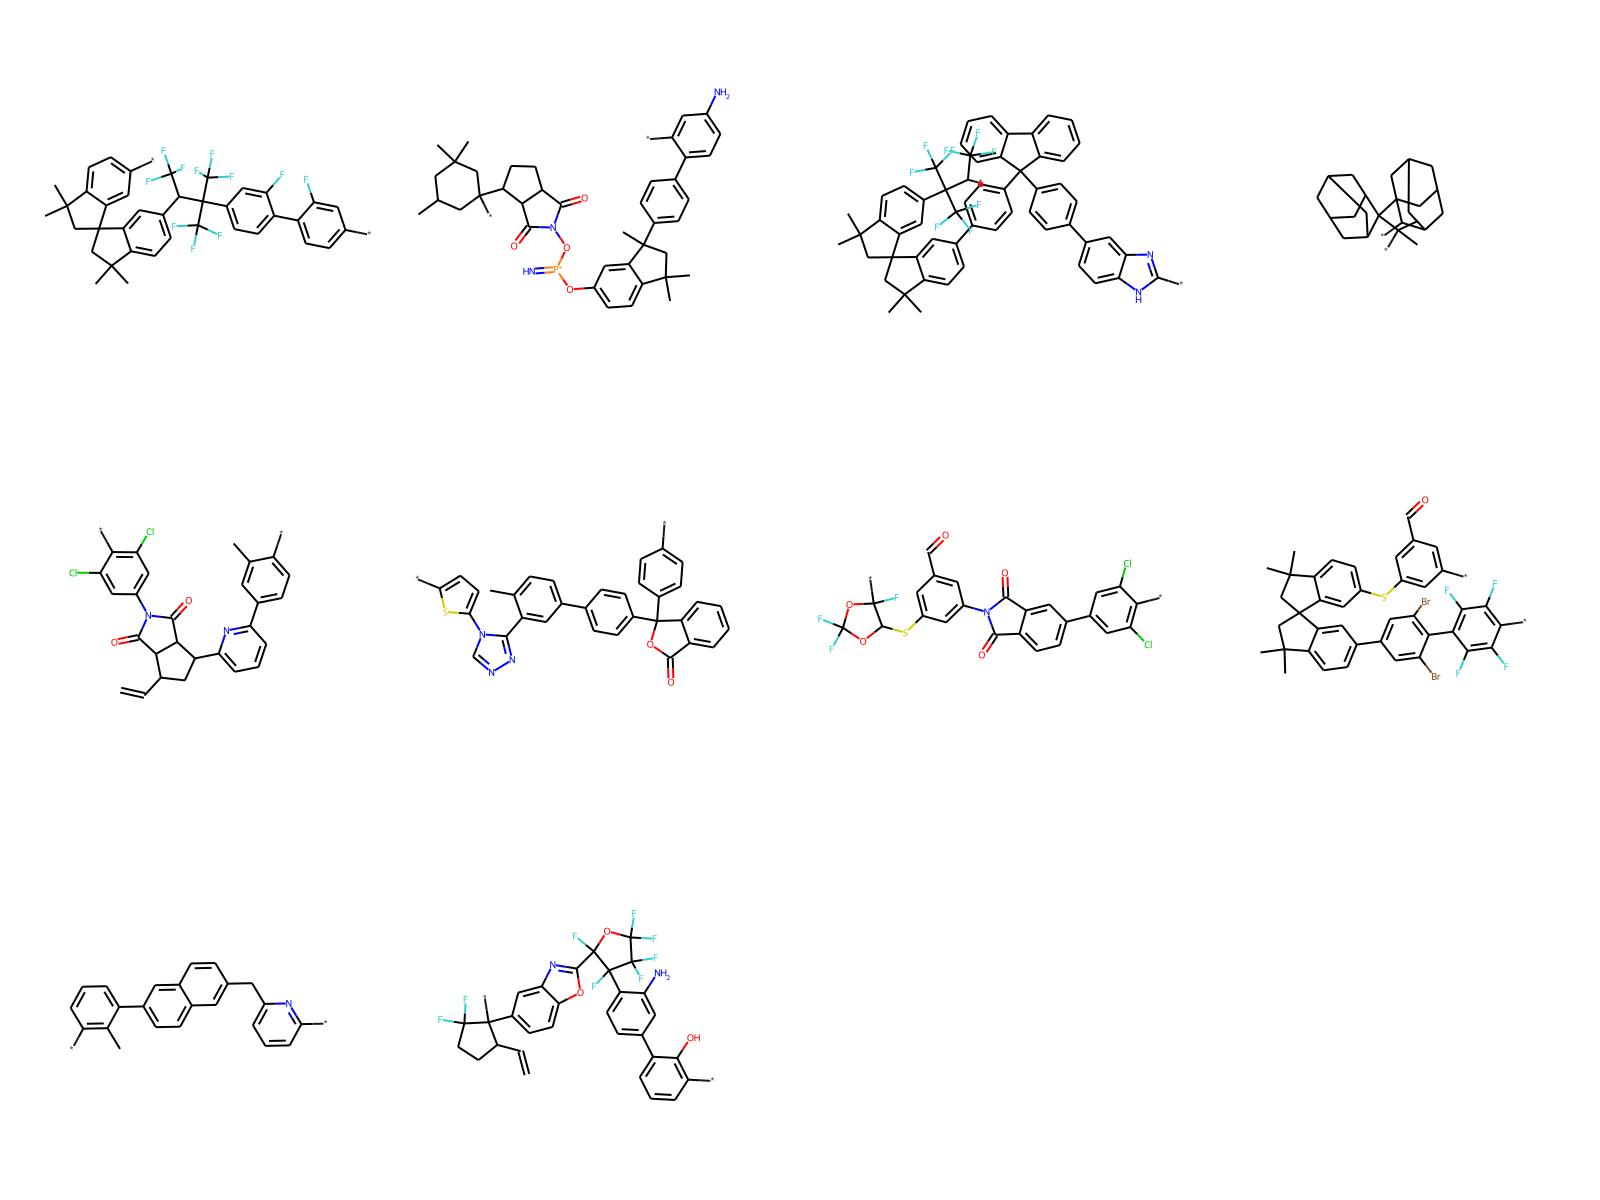

In [ ]:
GA_smiles = final_results_df['SMILES'].tolist()
print(len(GA_smiles))
mols = [Chem.MolFromSmiles(x) for x in GA_smiles]
Draw.MolsToGridImage(mols, molsPerRow=4, maxMols=10, subImgSize=(400, 400))


<h2>Below is the plot code for CO2/N2 and CO2/O2</h2>

Number of points above the dotted line in CO2/N2 vs CO2 Permeability plot: 342
Number of points above the dotted line in CO2/O2 vs CO2 Permeability plot: 204


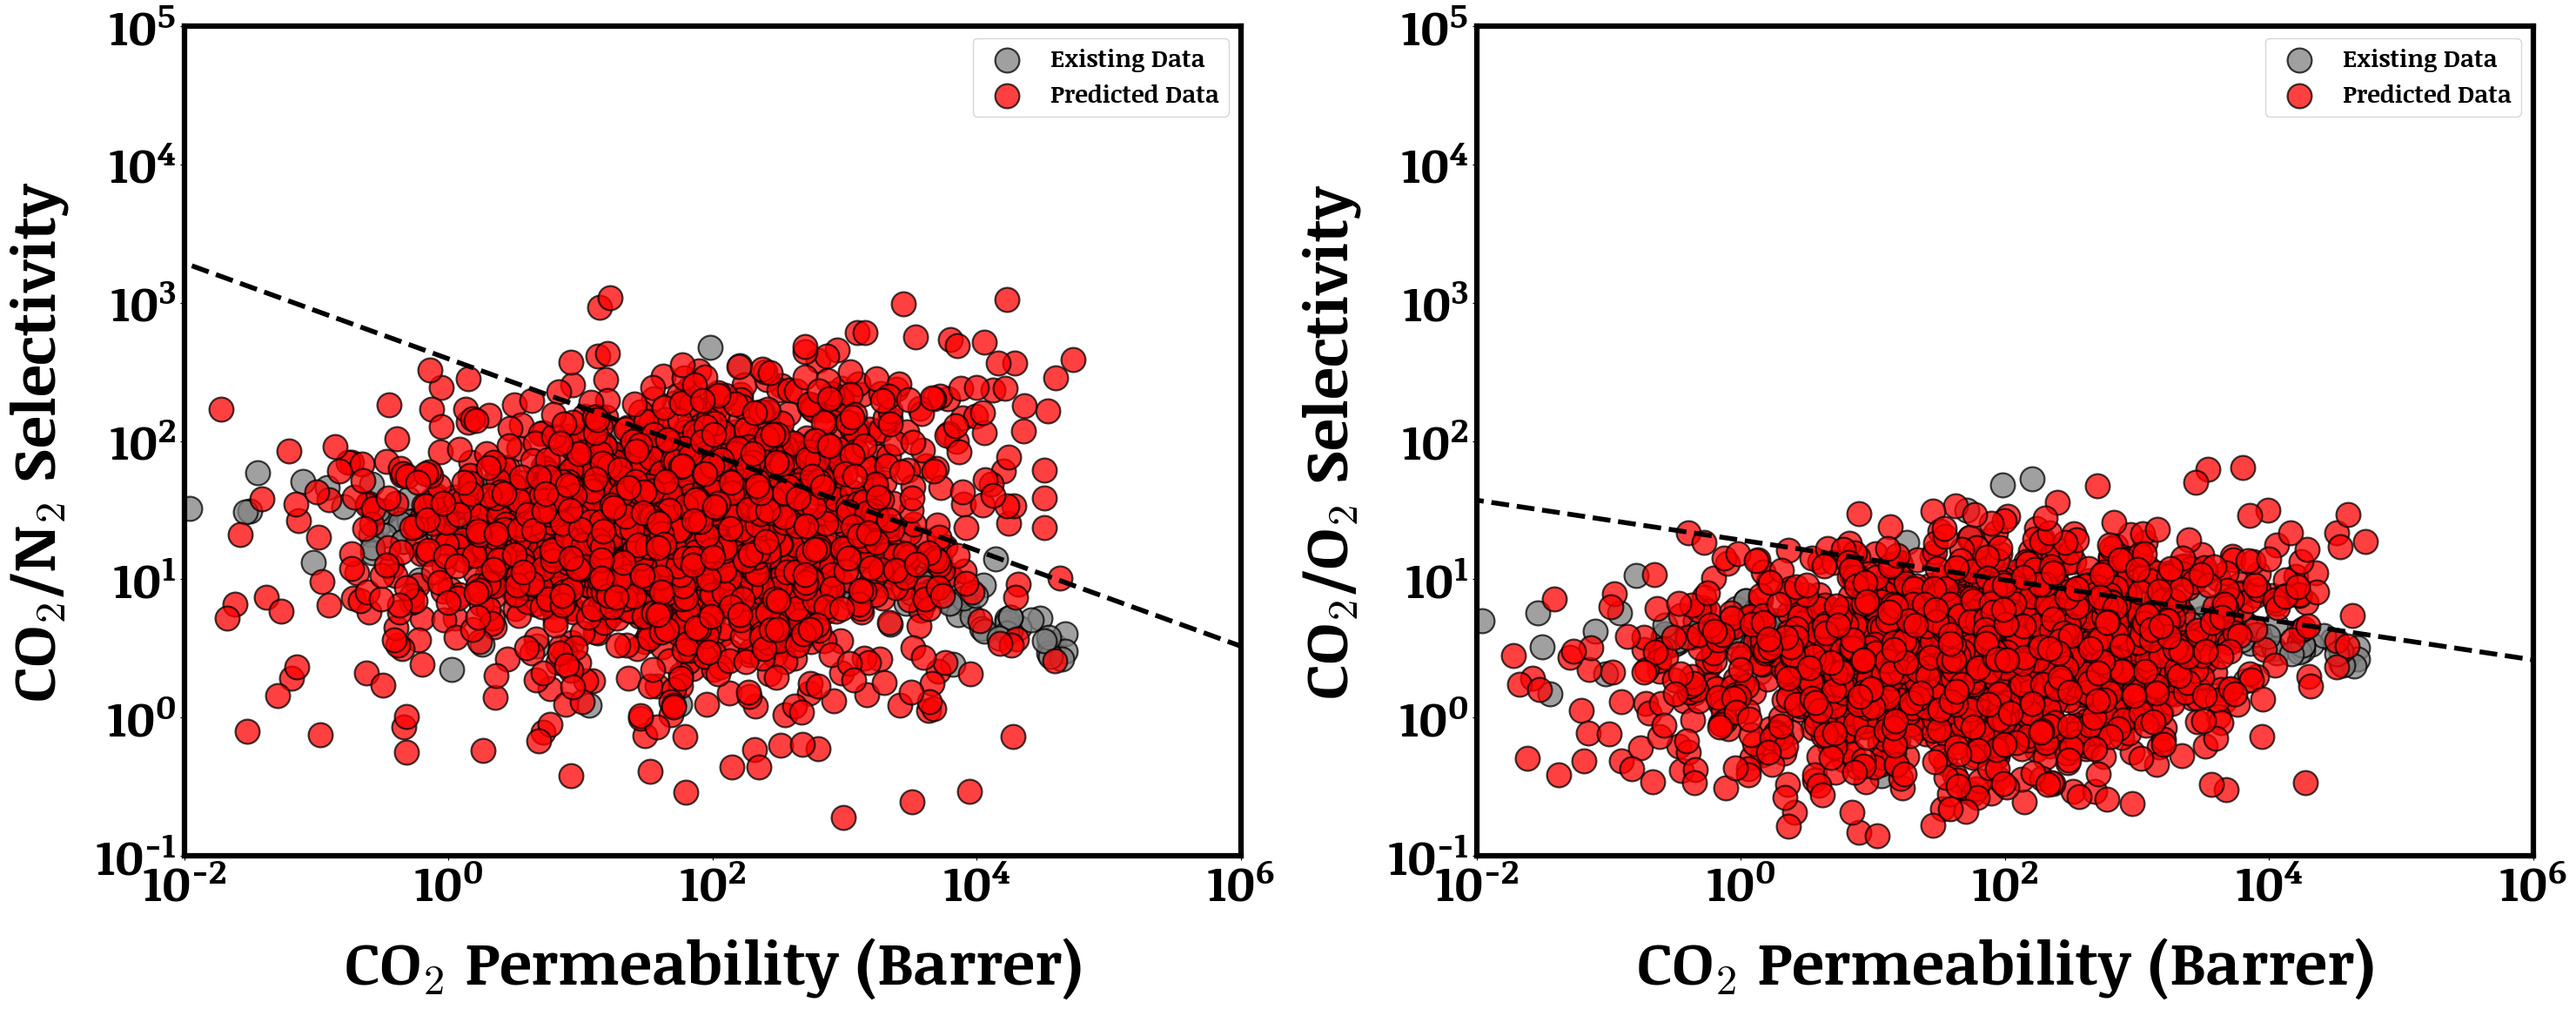

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Noticia Text'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.linewidth'] = 4.5
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 40
plt.rcParams['xtick.labelsize'] = 40 
plt.rcParams['ytick.labelsize'] = 40
for p in plt.rcParams:
    if 'weight' in p:
        plt.rcParams[p] = 'bold'

# Initialize figure and axes
fig, axs = plt.subplots(1, 2, figsize=(30, 12))

# Replace with actual path
predicted_df = final_results_df  

# Calculate selectivity ratios for predicted data
predicted_df['CO2/O2'] = predicted_df['Predicted_CO2'] / predicted_df['Predicted_O2']
predicted_df['CO2/N2'] = predicted_df['Predicted_CO2'] / predicted_df['Predicted_N2']
predicted_df['O2/N2'] = predicted_df['Predicted_O2'] / predicted_df['Predicted_N2']

# Combine the existing data with predicted data
combined_df = pd.concat([df, predicted_df], ignore_index=True)

# Create the scatter plots

# Scatter plot for CO2/N2 selectivity vs CO2 permeability
sns.scatterplot(x=df['CO2'], y=df['CO2/N2'], color='grey',s=400,edgecolor='k', alpha=0.75, ax=axs[0], label='Existing Data')
sns.scatterplot(x=predicted_df['Predicted_CO2'], y=predicted_df['CO2/N2'], color='red',edgecolor='k', s=400, alpha=0.75, ax=axs[0], label='Predicted Data')
axs[0].set(xscale="log", yscale="log")
axs[0].set_xlim(1e-2, 1e6)
axs[0].set_ylim(1e-1, 1e5)
axs[0].set_xlabel(r'CO$_2$ Permeability (Barrer)',labelpad=20,fontsize=50,fontweight='bold')
axs[0].set_ylabel(r'CO$_2$/N$_2$ Selectivity',labelpad=20,fontsize=50,fontweight='bold')
axs[0].legend()

# Scatter plot for CO2/O2 selectivity vs CO2 permeability
sns.scatterplot(x=df['CO2'], y=df['CO2/O2'], color='grey', edgecolor='k', s=400, alpha=0.75, ax=axs[1], label='Existing Data')
sns.scatterplot(x=predicted_df['Predicted_CO2'], y=predicted_df['CO2/O2'], color='red', edgecolor='k', s=400, alpha=0.75, ax=axs[1], label='Predicted Data')
axs[1].set(xscale="log", yscale="log")
axs[1].set_xlim(1e-2, 1e6)
axs[1].set_ylim(1e-1, 1e5)
axs[1].set_xlabel(r'CO$_2$ Permeability (Barrer)',labelpad=20,fontsize=50,fontweight='bold')
axs[1].set_ylabel(r'CO$_2$/O$_2$ Selectivity',labelpad=20,fontsize=50,fontweight='bold')
axs[1].legend()

# Plot Robeson upper bounds

# For CO2/N2 vs CO2 permeability
k1 = 30.967e6  # kCO2N2
n1 = -2.888  # nCO2N2
x_permeability = np.linspace(1e-4, 1e6)
alphaco2_n2 = (x_permeability/k1)**(1/n1)
axs[0].plot(x_permeability,alphaco2_n2, 'k--', linewidth=4)

# For CO2/O2 vs CO2 permeability
k2 = 1.396e6  # kO2N2
n2 = -5.666  # nO2N2
alphaco2_O2 = (x_permeability/(k2**(n1/(n1-n2))/k1**(n2/(n1-n2))))**(1/((n1-n1*n2)/(n1-n2)))
axs[1].plot(x_permeability,alphaco2_O2, 'k--', linewidth=4)

# Calculate the y-values on the dotted line for each x in the predicted data
predicted_df['dotted_line_CO2_N2'] = (predicted_df['Predicted_CO2']/k1)**(1/n1)
predicted_df['dotted_line_CO2_O2'] = (predicted_df['Predicted_CO2']/(k2**(n1/(n1-n2))/k1**(n2/(n1-n2))))**(1/((n1-n1*n2)/(n1-n2)))
predicted_df['Top_Difference_N2'] = (predicted_df['CO2/N2']-predicted_df['dotted_line_CO2_N2'])
predicted_df['Top_Difference_O2'] = (predicted_df['CO2/O2']-predicted_df['dotted_line_CO2_O2'])

# Count the number of points above the dotted line for CO2/N2 vs CO2 Permeability
count_above_line_CO2_N2 = np.sum(predicted_df['CO2/N2'] > predicted_df['dotted_line_CO2_N2'])

# Count the number of points above the dotted line for CO2/O2 vs CO2 Permeability
count_above_line_CO2_O2 = np.sum(predicted_df['CO2/O2'] > predicted_df['dotted_line_CO2_O2'])

# Print the results
print(f"Number of points above the dotted line in CO2/N2 vs CO2 Permeability plot: {count_above_line_CO2_N2}")
print(f"Number of points above the dotted line in CO2/O2 vs CO2 Permeability plot: {count_above_line_CO2_O2}")

# Adjust layout
plt.tight_layout()

# Define the directory and filename to save the plot
save_directory = GA_plots_path
os.makedirs(save_directory, exist_ok=True)
save_path = os.path.join(save_directory, f"Selectivities.png")

# Save the plot
fig.savefig(save_path, dpi=300, transparent=True)

# Show plot
plt.show()

In [ ]:
above_bound_CO2_N2_df = predicted_df[predicted_df['CO2/N2'] > predicted_df['dotted_line_CO2_N2']]
above_bound_CO2_O2_df = predicted_df[predicted_df['CO2/O2'] > predicted_df['dotted_line_CO2_O2']]

print(len(above_bound_CO2_N2_df),len(above_bound_CO2_O2_df))

count_text = f'''For CO2/N2 - {len(above_bound_CO2_N2_df)}
For CO2/O2 - {len(above_bound_CO2_O2_df)}
'''

filename = "/Count_Above_Robeson_Plot.txt"
txt_dir = GA_polymers_path + filename
# Define the directory to save the files
save_directory = GA_polymers_path
os.makedirs(save_directory, exist_ok=True)

# Open the file in write mode and save the multi-line string
with open(txt_dir, 'w') as file:
    file.write(count_text)


above_bound_CO2_N2_df.to_csv(GA_polymers_path+f'/Above_Robeson_CO2_N2.csv',index=False)
above_bound_CO2_O2_df.to_csv(GA_polymers_path+f'/Above_Robeson_CO2_O2.csv',index=False)

342 204


In [ ]:
df.shape,predicted_df.shape

((596, 8), (2000, 13))

In [ ]:
predicted_df.head()

,SMILES,Predicted_CO2,Predicted_O2,Predicted_N2,SAScores,Fitness,CO2/O2,CO2/N2,O2/N2,dotted_line_CO2_N2,dotted_line_CO2_O2,Top_Difference_N2,Top_Difference_O2
0,CC1(C)CC2(CC(C)(C)c3ccc(C(C(F)(F)F)C(c4ccc(c5c...,125.287331,58.817558,12.607754,5.508253,274.395050,2.130101,9.937324,4.665189,73.685081,9.552941,-63.747757,-7.422841
1,CC1CC(C)(C)CC([*])(C2CCC3C(=O)N(O[P+](=N)Oc4cc...,4141.596191,410.322296,62.291317,5.762358,2702.854736,10.093520,66.487534,6.587151,21.944201,5.766418,44.543335,4.327103
2,CC1(C)CC2(CC(C)(C)c3ccc(c4ccc(C5(c6ccc(c7ccc8[...,308.417206,61.693237,18.653374,5.546336,204.041138,4.999206,16.534124,3.307350,53.940083,8.388454,-37.405960,-3.389248
3,CC(C)([*])C1(C23CC4CC(CC(C4)C2[*])C3)C2CC3CC(C...,512.919250,128.832413,38.492588,6.473001,431.194458,3.981290,13.325143,3.346941,45.229218,7.794788,-31.904076,-3.813498
4,C=CC1CC(c2cccc(c3ccc([*])c(C)c3)n2)C2C(=O)N(c3...,6.574137,1.540679,0.264220,4.815947,8.983749,4.267040,24.881256,5.831034,204.463852,14.616803,-179.582596,-10.349764


In [256]:
df['O2/N2'] = df['O2']/df['N2']

Number of points above the dotted line in CO2/N2 vs CO2 Permeability plot: 1073


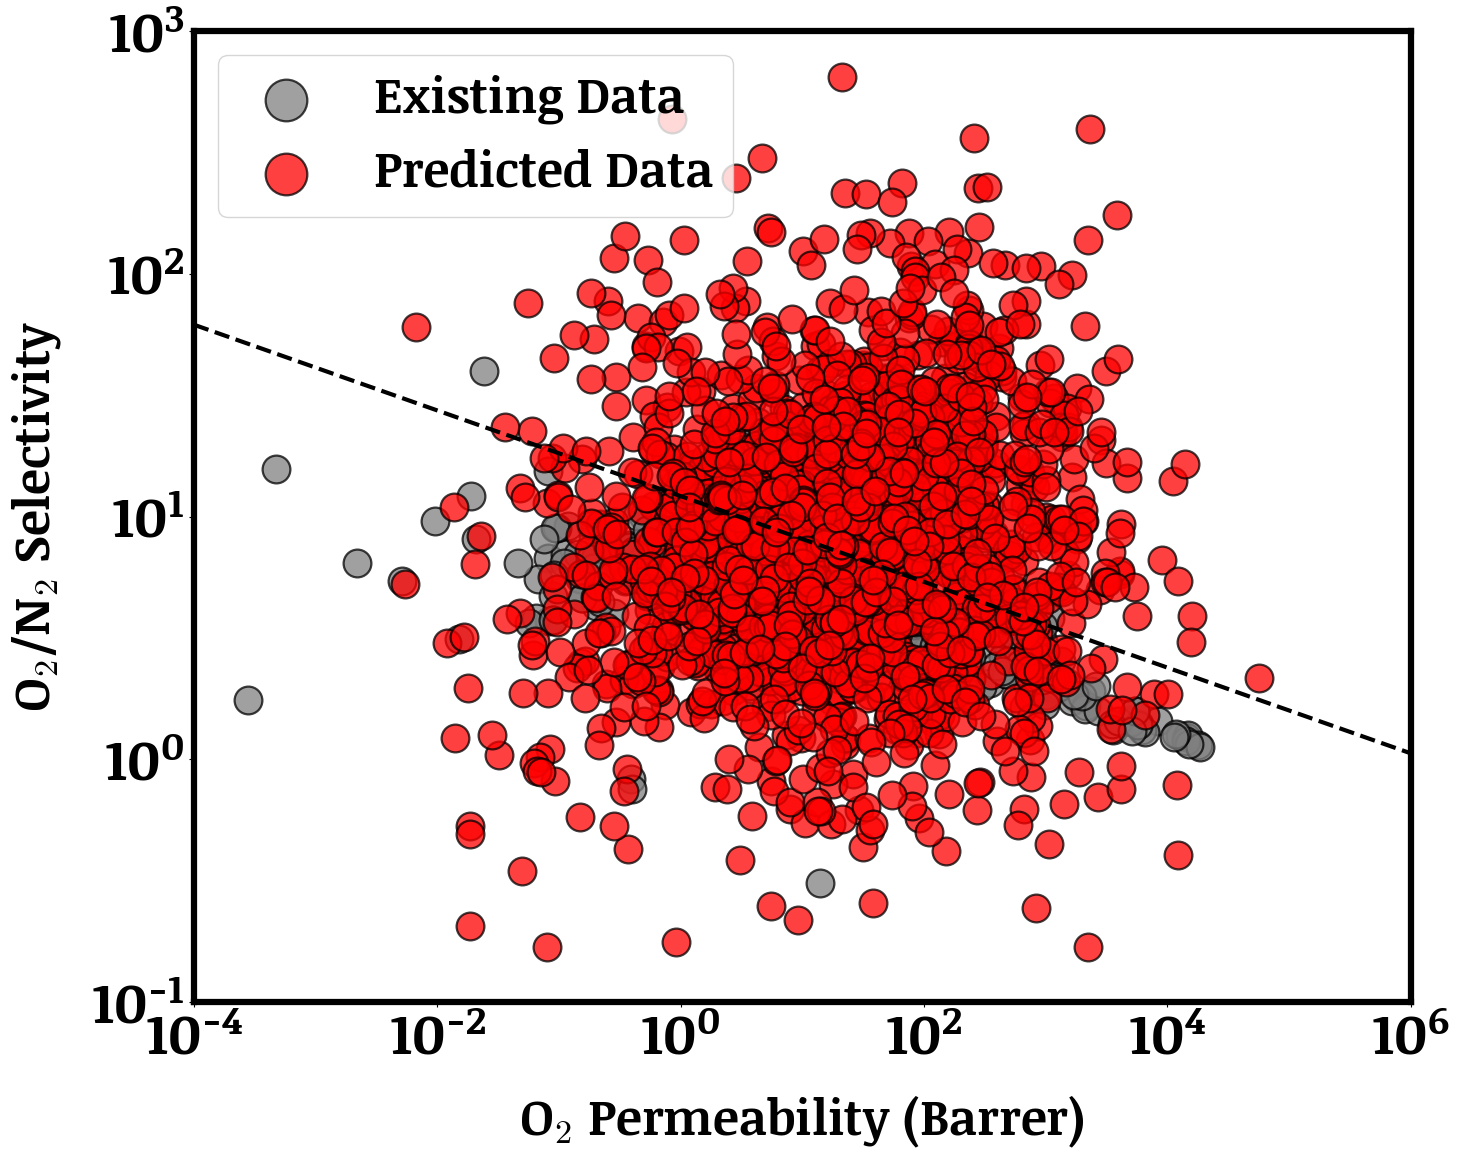

In [262]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Noticia Text'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.linewidth'] = 4.5
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 40
plt.rcParams['xtick.labelsize'] = 40 
plt.rcParams['ytick.labelsize'] = 40
for p in plt.rcParams:
    if 'weight' in p:
        plt.rcParams[p] = 'bold'

# Initialize figure and axes
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# Load data from CSV
# Replace with actual path
predicted_df = final_results_df  

# Calculate selectivity ratios for predicted data
predicted_df['CO2/O2'] = predicted_df['Predicted_CO2'] / predicted_df['Predicted_O2']
predicted_df['CO2/N2'] = predicted_df['Predicted_CO2'] / predicted_df['Predicted_N2']
predicted_df['O2/N2'] = predicted_df['Predicted_O2'] / predicted_df['Predicted_N2']

# Combine the existing data with predicted data
combined_df = pd.concat([df, predicted_df], ignore_index=True)

# Create the scatter plot for O2/N2 selectivity vs O2 permeability
scatter_existing = sns.scatterplot(x=df['O2'], y=df['O2/N2'], color='grey', edgecolor='k', edgecolors='black',s=400, alpha=0.75, ax=ax, label='Existing Data')
scatter_predicted = sns.scatterplot(x=predicted_df['Predicted_O2'], y=predicted_df['O2/N2'],edgecolors='black', color='red', edgecolor='k', s=400, alpha=0.75, ax=ax, label='Predicted Data')
ax.set(xscale="log", yscale="log")
ax.set_xlim(1e-4, 1e6)
ax.set_ylim(1e-1, 1e3)
ax.set_xlabel(r'O$_2$ Permeability (Barrer)', fontsize=35,labelpad=20)
ax.set_ylabel(r'O$_2$/N$_2$ Selectivity', fontsize=35,labelpad=20)

# Custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, fontsize=35, markerscale=1.5)  # Increase fontsize and markerscale for bigger legend markers

# Plot Robeson upper bounds for O2/N2 vs O2 permeability
k1 = 1396000  # kCO2N2
n1 = -5.666  # nCO2N2
x_perm_o2 = np.linspace(1e-4, 1000000)
Po2 = (x_perm_o2/k1)**(1/n1)
ax.plot(x_perm_o2, Po2, 'k--', linewidth=3)

# Calculate the y-values on the dotted line for each x in the predicted data
predicted_df['dotted_line_O2'] = (predicted_df['Predicted_O2']/k1)**(1/n1)

# Count the number of points above the dotted line for CO2/N2 vs CO2 Permeability
count_above_line_O2_N2 = np.sum(predicted_df['O2/N2'] > predicted_df['dotted_line_O2'])

print(f"Number of points above the dotted line in CO2/N2 vs CO2 Permeability plot: {count_above_line_O2_N2}")

# Adjust layout
plt.tight_layout()

# Define the directory and filename to save the plot
save_directory = GA_plots_path
os.makedirs(save_directory, exist_ok=True)
save_path = os.path.join(save_directory, f"XGBR_O2.png")

# Save the plot
fig.savefig(save_path, dpi=300, transparent=True)

# Show plot
plt.show()




In [ ]:
predicted_df.head()

,SMILES,Predicted_CO2,Predicted_O2,Predicted_N2,SAScores,Fitness,CO2/O2,CO2/N2,O2/N2,dotted_line_CO2_N2,dotted_line_CO2_O2,Top_Difference_N2,Top_Difference_O2
0,CC1(C)CC2(CC(C)(C)c3ccc(C(C(F)(F)F)C(c4ccc(c5c...,125.287331,58.817558,12.607754,5.508253,274.395050,2.130101,9.937324,4.665189,73.685081,9.552941,-63.747757,-7.422841
1,CC1CC(C)(C)CC([*])(C2CCC3C(=O)N(O[P+](=N)Oc4cc...,4141.596191,410.322296,62.291317,5.762358,2702.854736,10.093520,66.487534,6.587151,21.944201,5.766418,44.543335,4.327103
2,CC1(C)CC2(CC(C)(C)c3ccc(c4ccc(C5(c6ccc(c7ccc8[...,308.417206,61.693237,18.653374,5.546336,204.041138,4.999206,16.534124,3.307350,53.940083,8.388454,-37.405960,-3.389248
3,CC(C)([*])C1(C23CC4CC(CC(C4)C2[*])C3)C2CC3CC(C...,512.919250,128.832413,38.492588,6.473001,431.194458,3.981290,13.325143,3.346941,45.229218,7.794788,-31.904076,-3.813498
4,C=CC1CC(c2cccc(c3ccc([*])c(C)c3)n2)C2C(=O)N(c3...,6.574137,1.540679,0.264220,4.815947,8.983749,4.267040,24.881256,5.831034,204.463852,14.616803,-179.582596,-10.349764


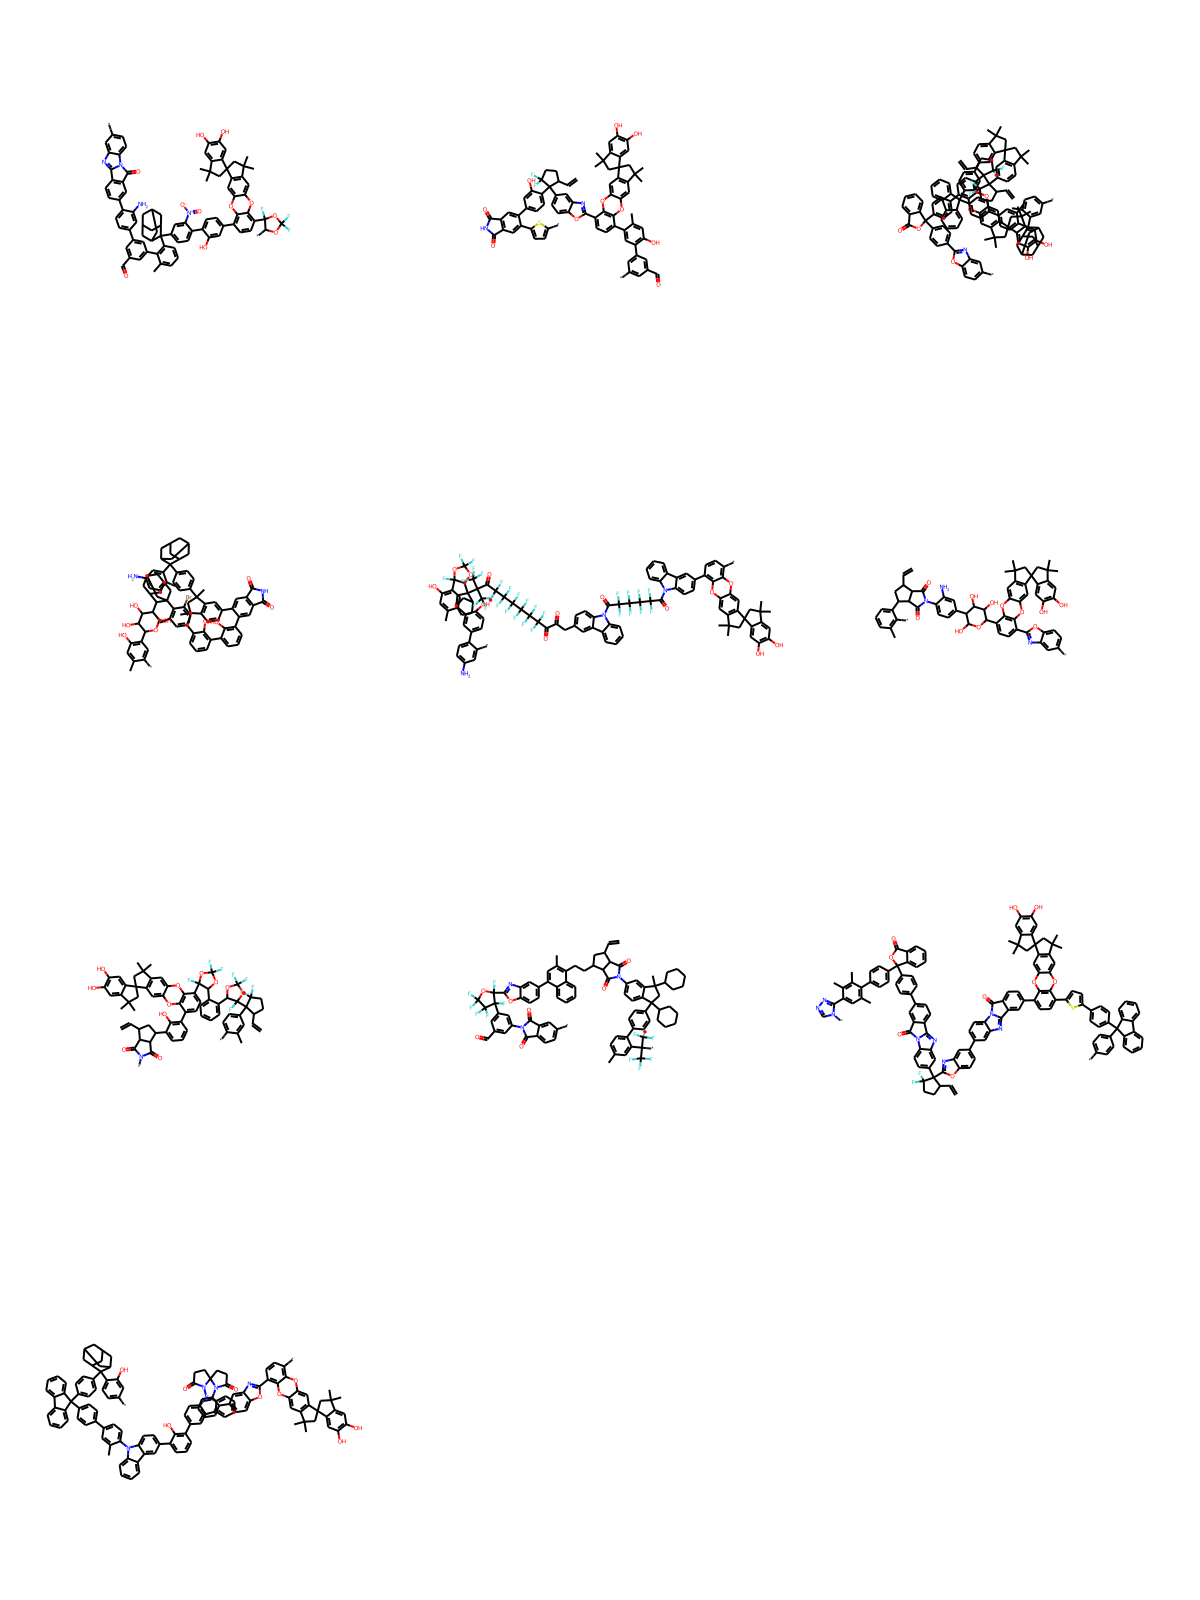

In [ ]:

# # Ensure the SAScore script and the fpscores.pkl.gz file are in the same directory
# sascorer_script_url = "https://raw.githubusercontent.com/rdkit/rdkit/master/Contrib/SA_Score/sascorer.py"
# fpscores_url = "https://github.com/rdkit/rdkit/raw/master/Contrib/SA_Score/fpscores.pkl.gz"

# # Download sascorer.py if not already downloaded
# if not os.path.exists("sascorer.py"):
#     response = requests.get(sascorer_script_url)
#     with open("sascorer.py", "w") as file:
#         file.write(response.text)

# # Download fpscores.pkl.gz if not already downloaded
# if not os.path.exists("fpscores.pkl.gz"):
#     response = requests.get(fpscores_url)
#     with open("fpscores.pkl.gz", "wb") as file:
#         file.write(response.content)




GA_smiles_top = final_results_df.nlargest(10, 'Fitness')['SMILES'].tolist()
mols = [Chem.MolFromSmiles(x) for x in GA_smiles_top]
Draw.MolsToGridImage(mols, subImgSize=(400, 400))
